# Importing libraries

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Dataset Description

In [2]:
df = pd.read_csv('/kaggle/input/very-simple-dataset-of-social-network-ads/Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


# Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


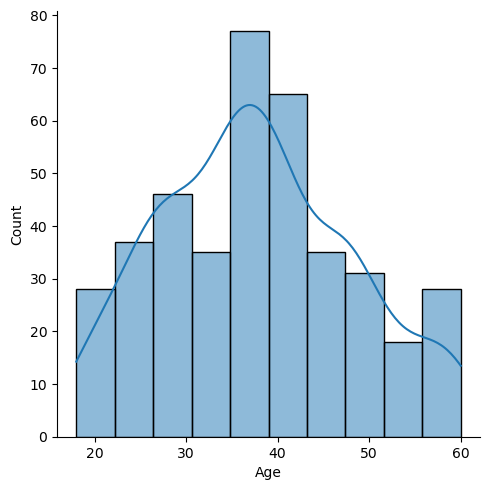

In [5]:
sns.displot(df['Age'], kde = True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


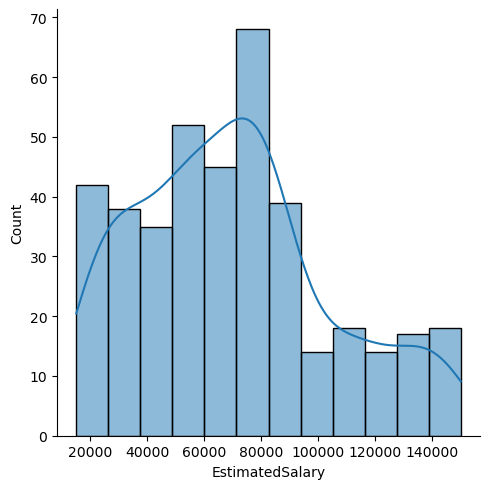

In [6]:
sns.displot(df['EstimatedSalary'], kde = True)

<Axes: xlabel='Purchased', ylabel='count'>

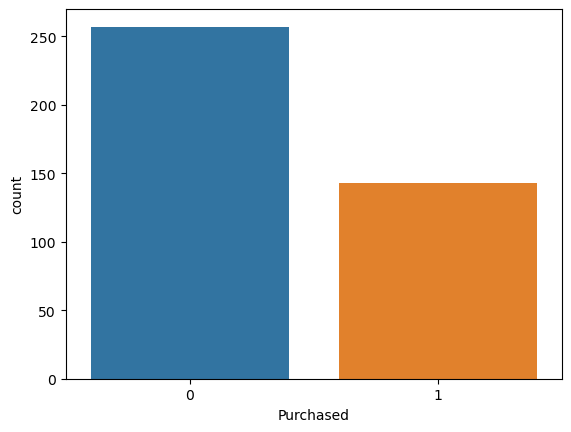

In [7]:
sns.countplot(x = df['Purchased'])

In [8]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

[]

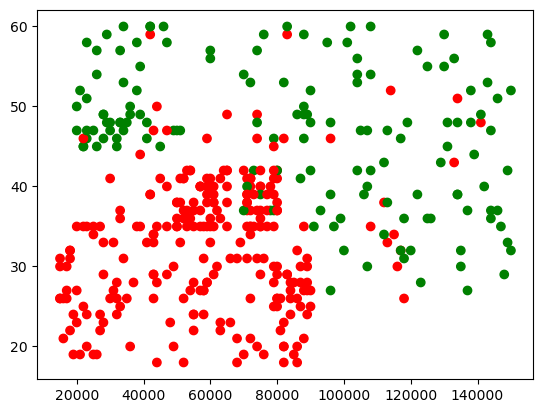

In [9]:
colors = {0: 'red', 1: 'green'}
plt.scatter(x = df['EstimatedSalary'], y = df['Age'], c = df['Purchased'].map(colors))
plt.plot()

# Train-Test Split

In [10]:
X = df.drop(['Purchased'], axis = 1)
y = df['Purchased']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Model Building

In [13]:
# method 1 for choosing k
k  = int(np.floor(np.sqrt(X_train.shape[0])))
k

16

In [14]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.9083333333333333

<Axes: >

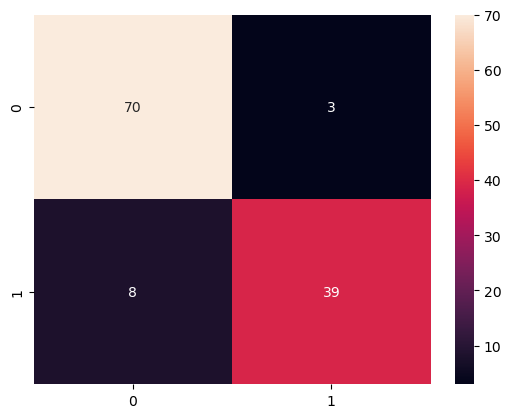

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [17]:
# method 2 for choosing k (trail and error)

acc_scores = []
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores.append((k, accuracy_score(y_test, y_pred)))

In [18]:
acc_scores

[(1, 0.8666666666666667),
 (2, 0.8333333333333334),
 (3, 0.9083333333333333),
 (4, 0.9083333333333333),
 (5, 0.9416666666666667),
 (6, 0.925),
 (7, 0.9416666666666667),
 (8, 0.9166666666666666),
 (9, 0.9333333333333333),
 (10, 0.9),
 (11, 0.925),
 (12, 0.9166666666666666),
 (13, 0.9166666666666666),
 (14, 0.9083333333333333),
 (15, 0.9166666666666666),
 (16, 0.9083333333333333),
 (17, 0.9333333333333333),
 (18, 0.925),
 (19, 0.925),
 (20, 0.9166666666666666),
 (21, 0.925),
 (22, 0.9166666666666666),
 (23, 0.9166666666666666),
 (24, 0.9166666666666666),
 (25, 0.9166666666666666)]

# Decision Boundary

In [19]:
a = np.arange(start = X_train[:,0].min() - 1, stop = X_train[:, 0].max() + 1, step = 0.1)
b = np.arange(start = X_train[:,1].min() - 1, stop = X_train[:, 1].max() + 1, step = 0.1)
XX, YY = np.meshgrid(a,b)

In [20]:
input_array = np.array([XX.ravel(), YY.ravel()]).T
labels = knn.predict(input_array)

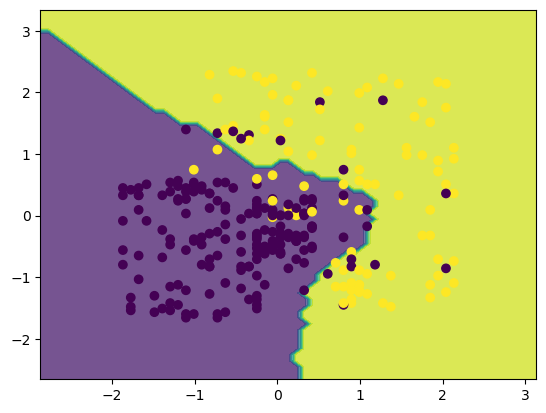

In [21]:
plt.contourf(XX, YY, labels.reshape(XX.shape), alpha = 0.75)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)